In [1]:
from roulette import Roulette
from core import *
import random
from simulations_core import simulate_different_goal_money
from simulations_plots_core import plot_money_histories

roulette = Roulette()

In [2]:
def split_money(money):
    pieces = []
    while money != 0:
        if money>=10:
            portion = random.randint(2, 10)
            money -= portion
            pieces.append(portion)
        else:
            pieces.append(money)
            money = 0
            
    return pieces

In [3]:
def labouchere_betting(goal_money_won, bet=1):
    bets = split_money(goal_money_won)
    money = 0
    money_history = [money]
    while money < goal_money_won:
        prev_money = money 
        if len(bets) == 1:
            bet = bets[0]
        else:
            bet = bets[0] + bets[-1]
        money += roulette.make_even_bet(bet)
        money_history.append(money)
        if money < prev_money:
            bets.append(bet)
        else:
            if len(bets) == 1 or len(bets) == 2:
                return money_history
            bets.pop(0)
            bets.pop()
    
    return money_history

In [4]:
money_histories = simulate_different_goal_money(
                    betting_type = labouchere_betting, 
                    goal_money_list = [10, 100, 500, 1000], 
                    number_histories = 1000)


## Analysis when the goal is to win 10 units

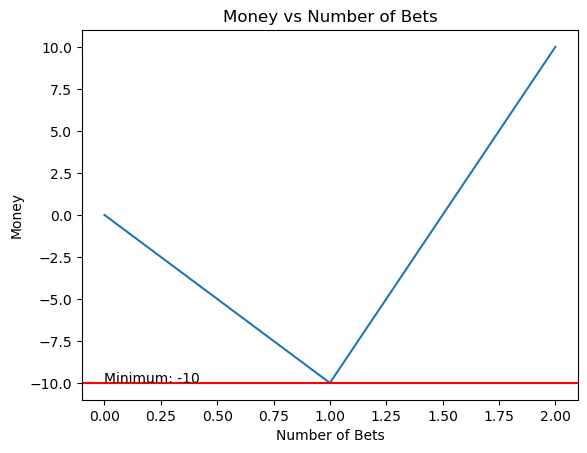

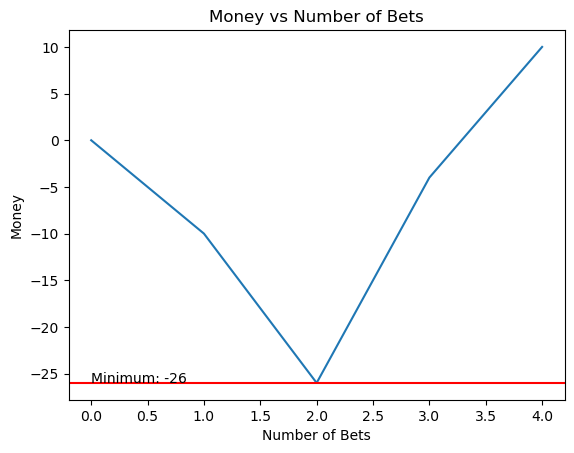

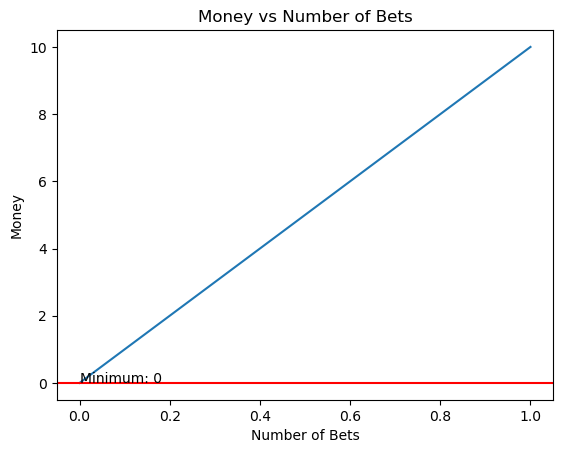

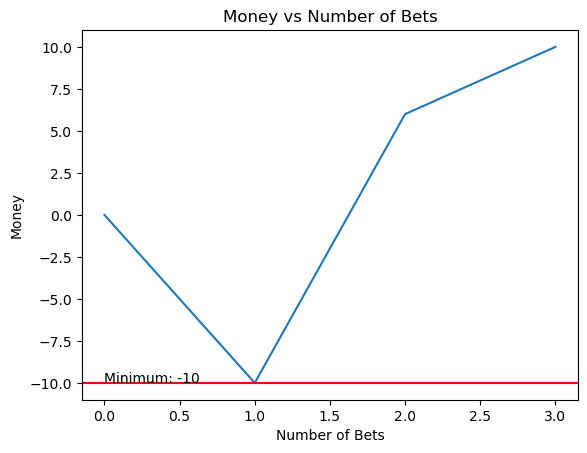

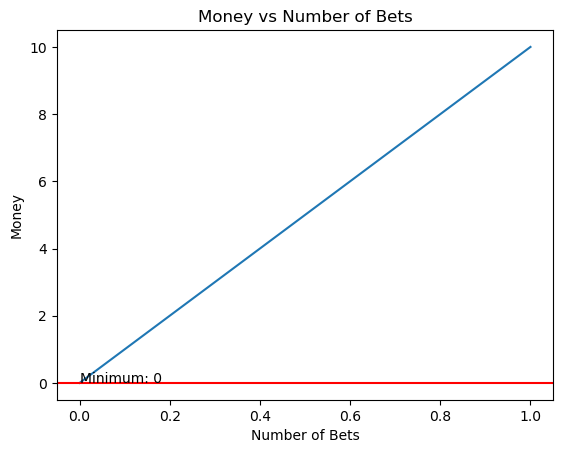

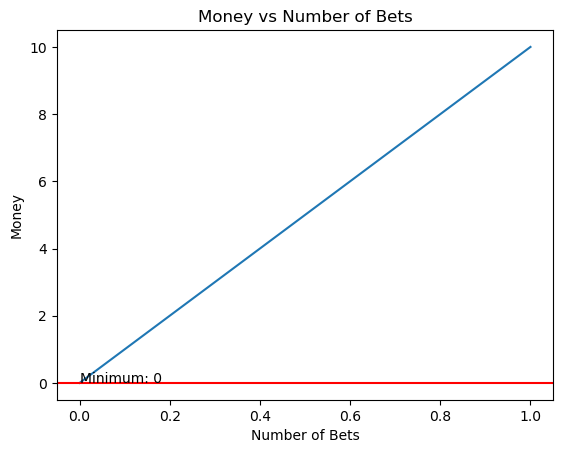

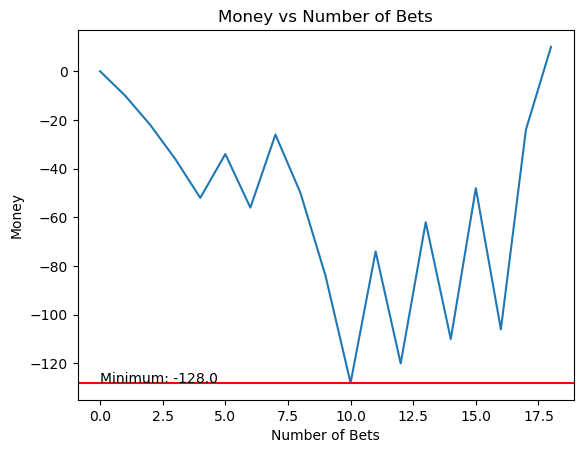

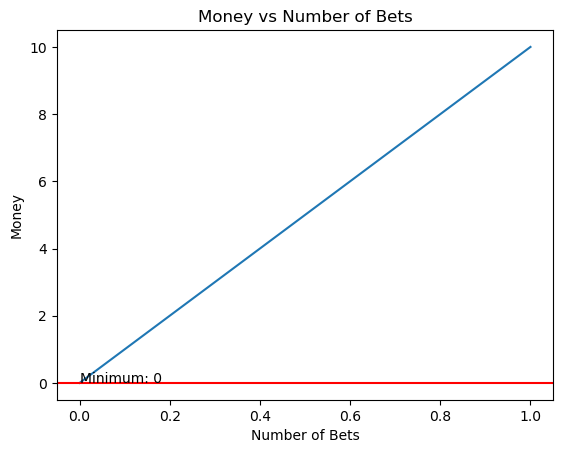

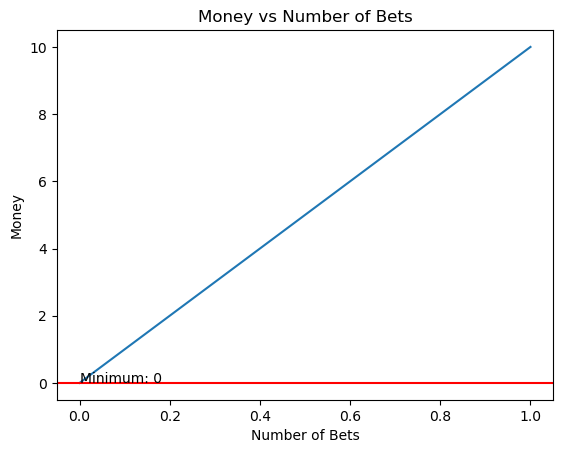

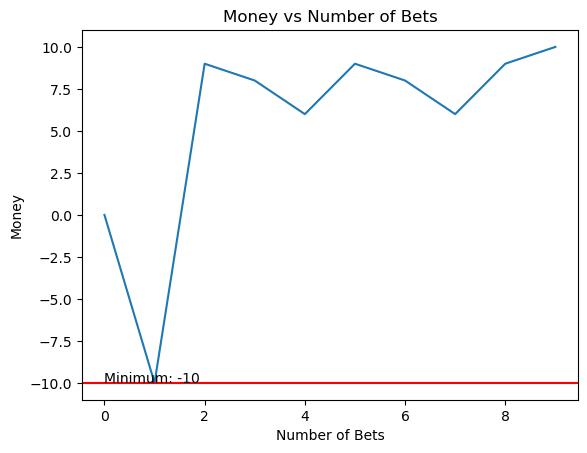

In [5]:
plot_money_histories(money_histories, 10)

## Analysis when the goal is to win 100 units

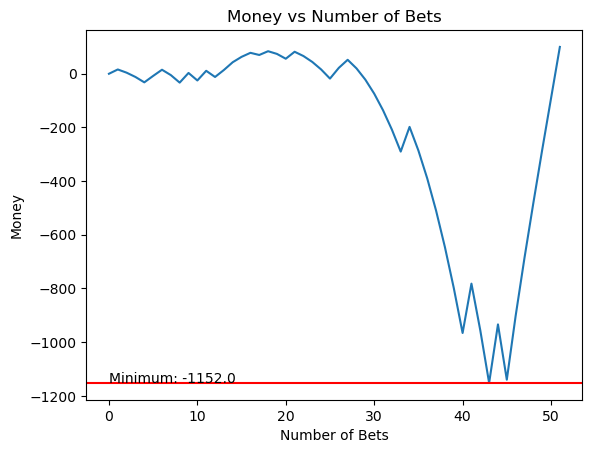

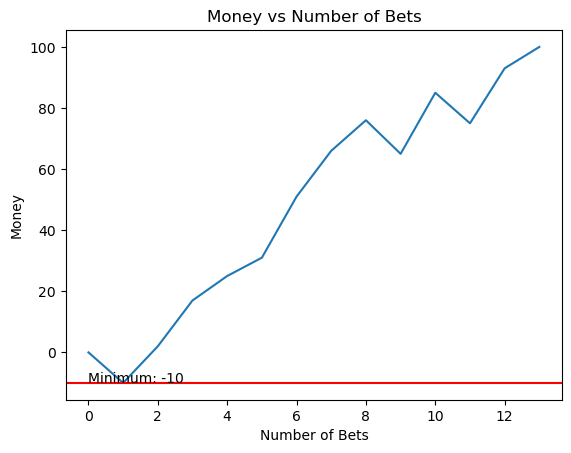

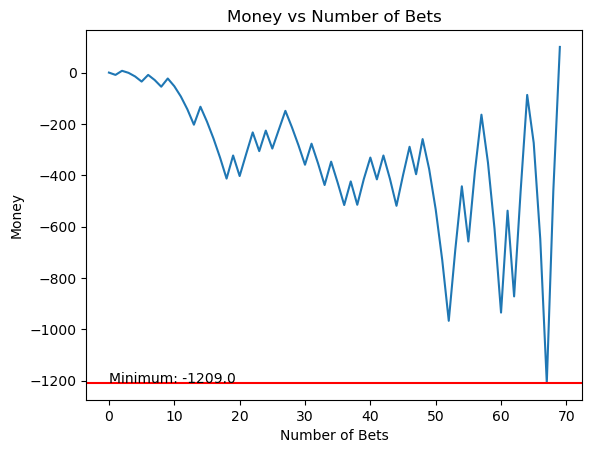

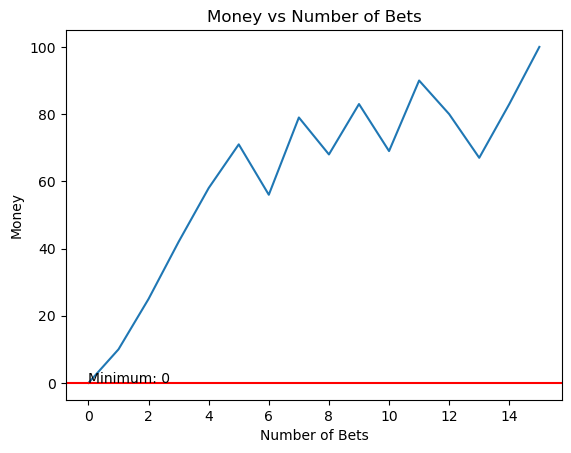

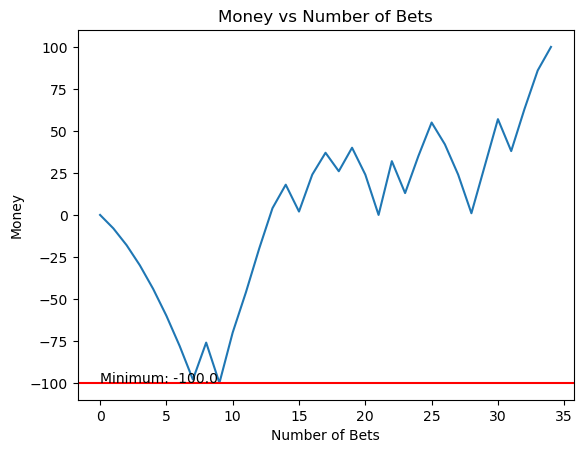

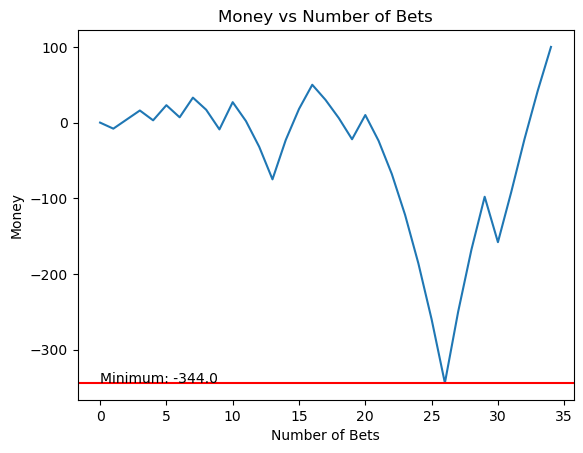

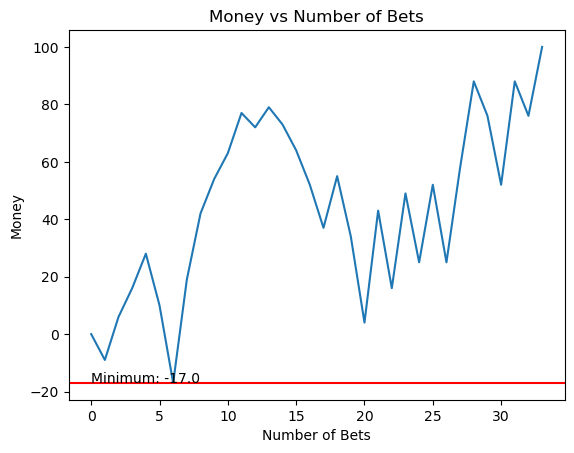

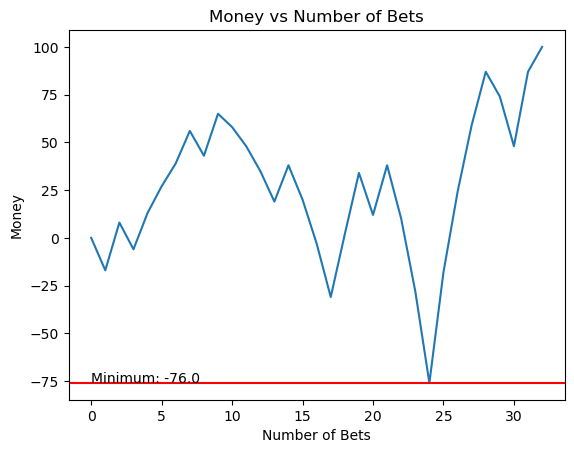

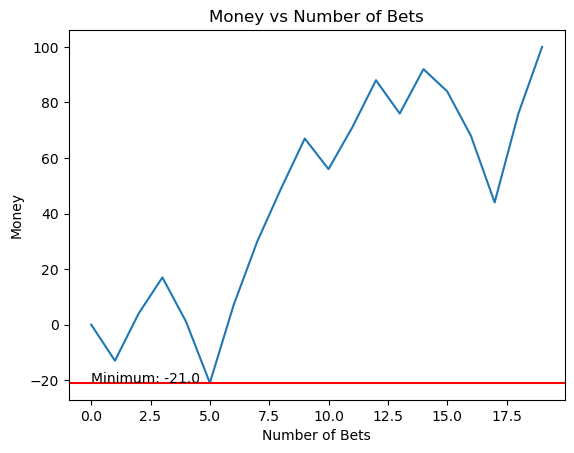

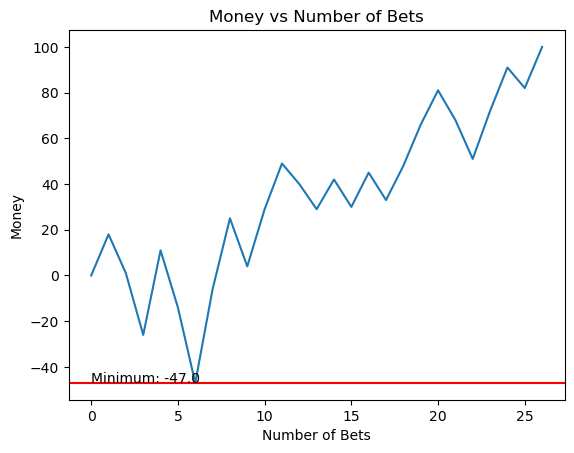

In [6]:
plot_money_histories(money_histories, 100)

## Analysis when the goal is to win 500 units

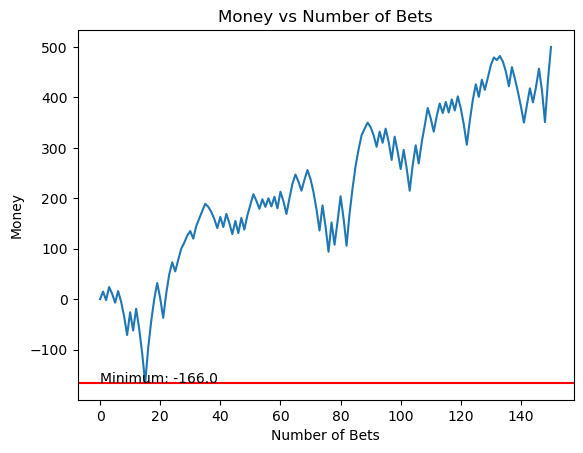

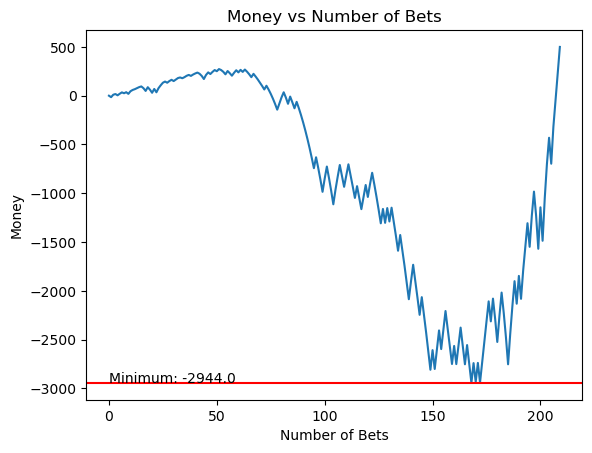

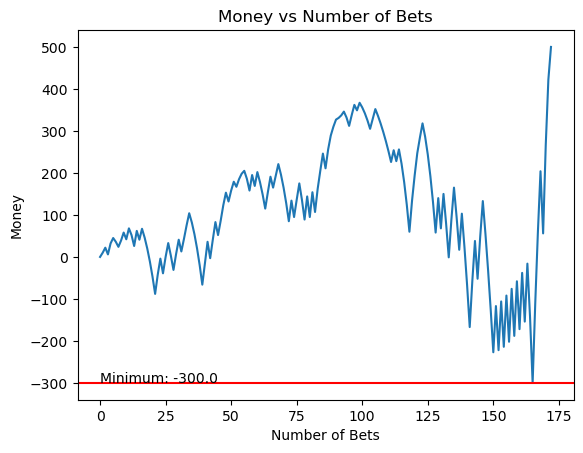

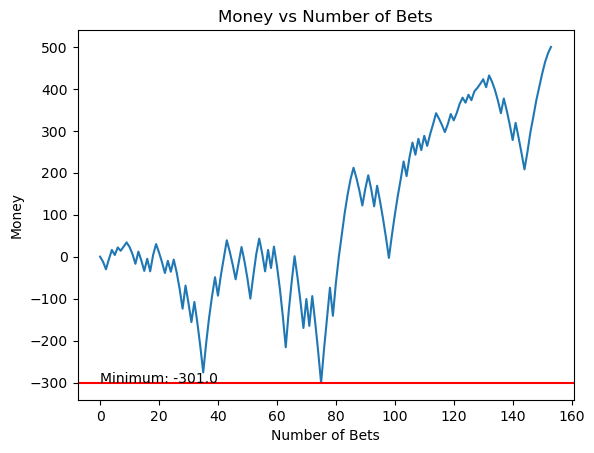

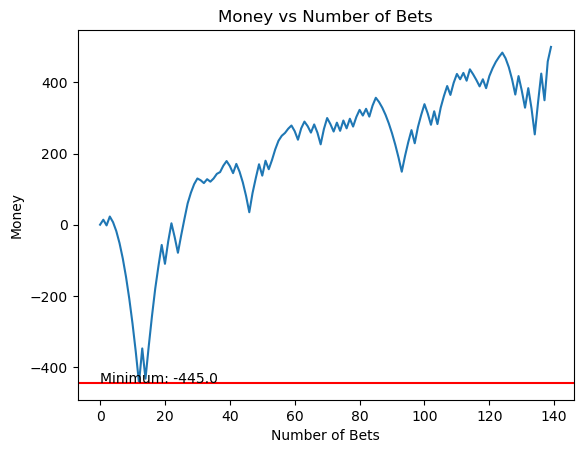

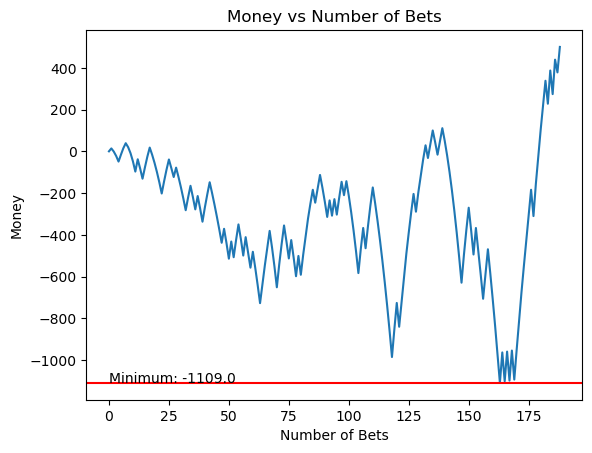

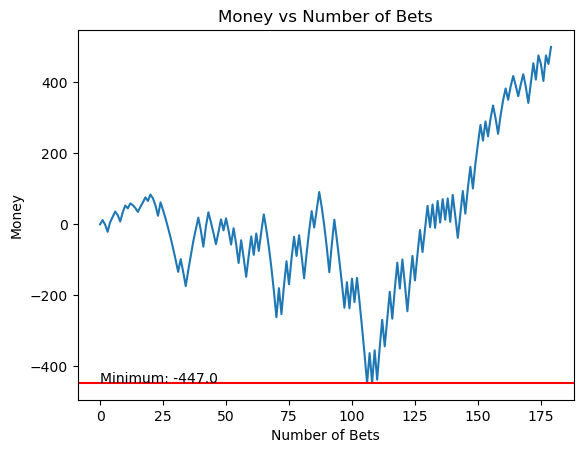

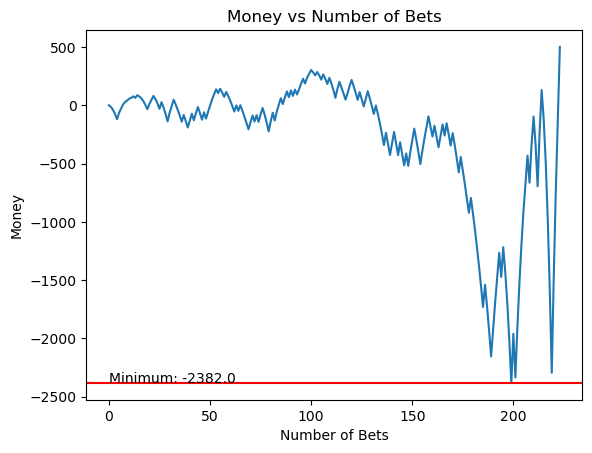

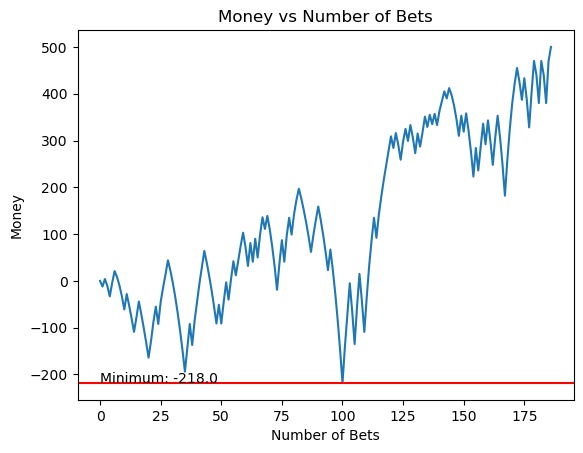

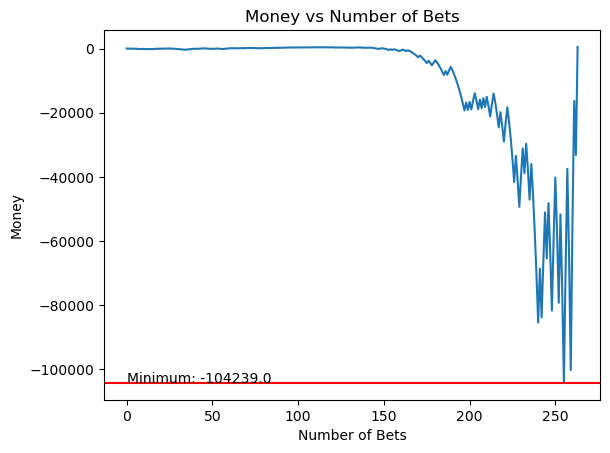

In [7]:
plot_money_histories(money_histories, 500)

## Analysis when the goal is to win 1000 units

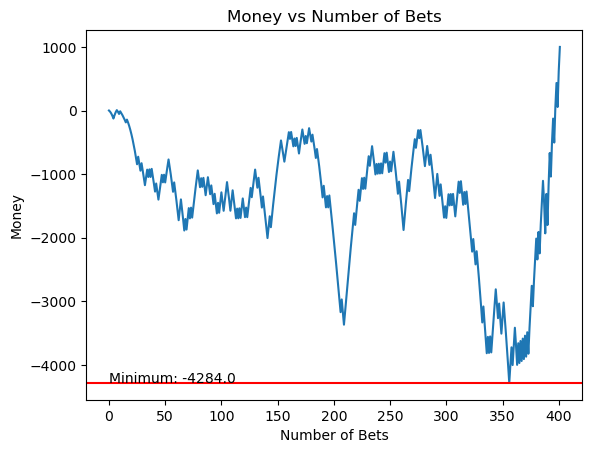

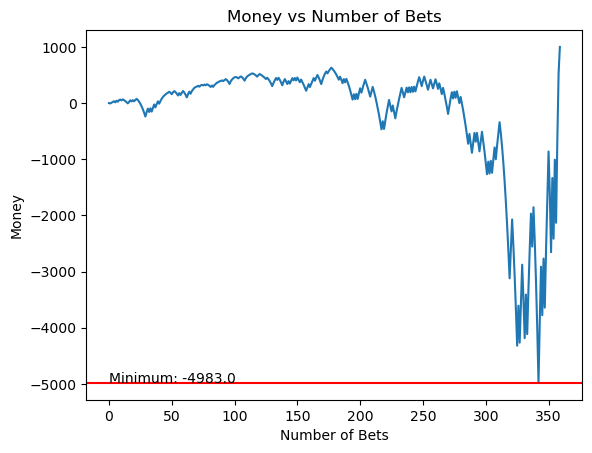

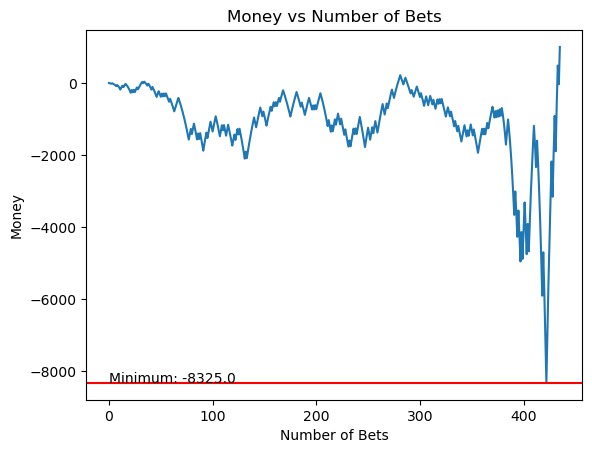

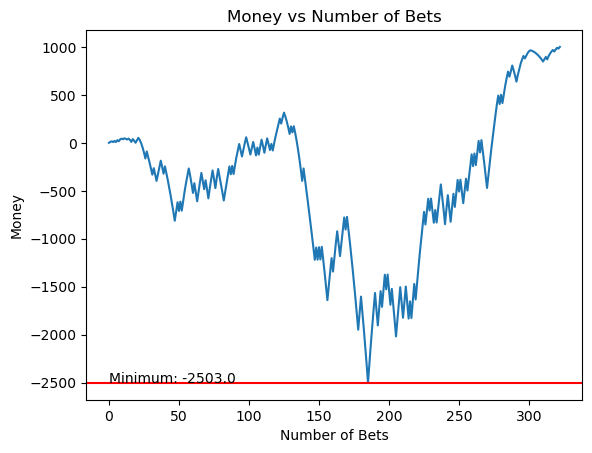

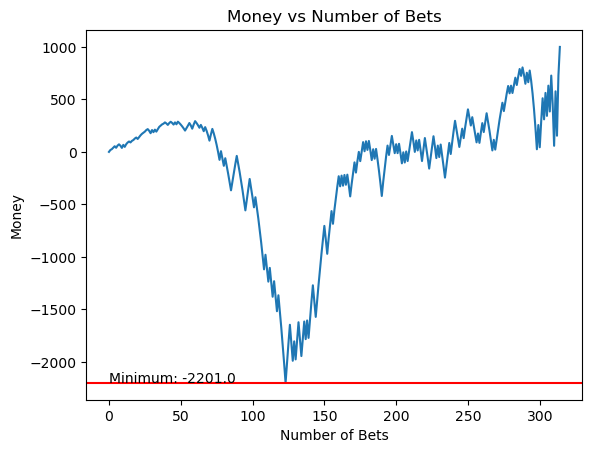

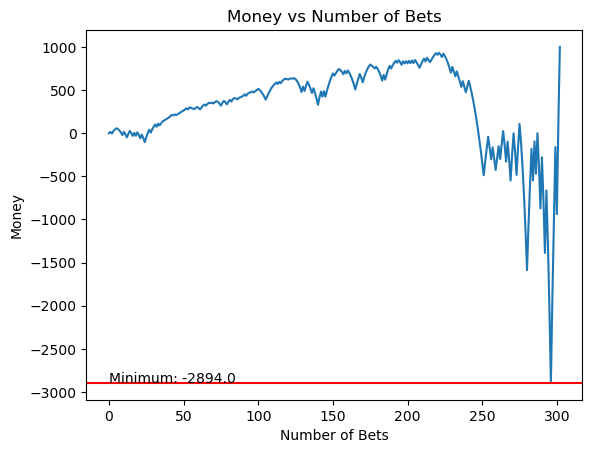

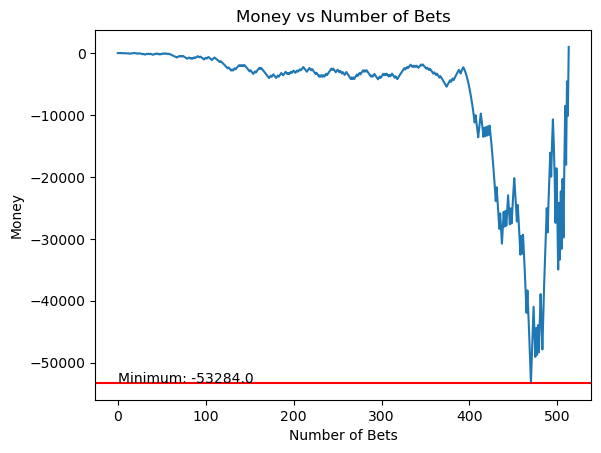

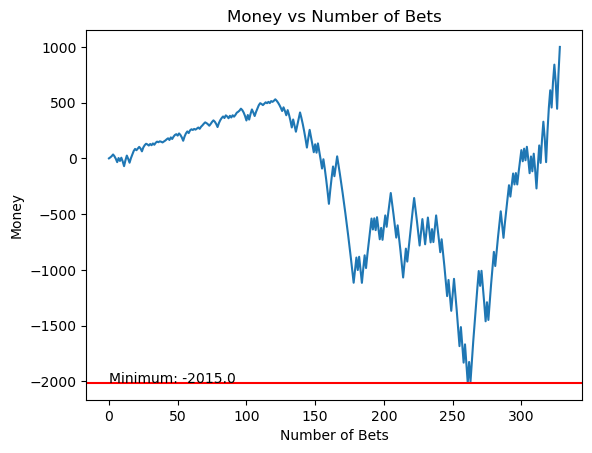

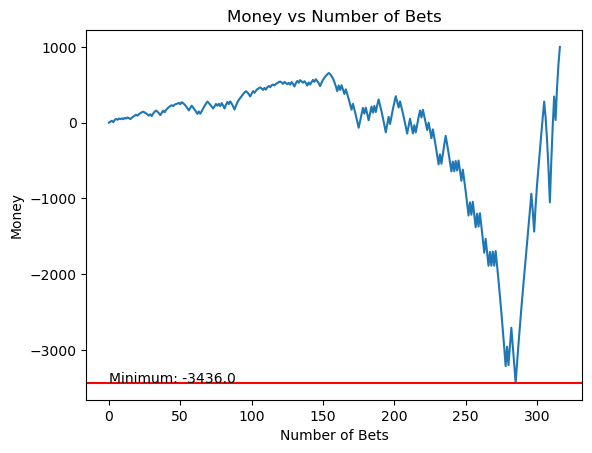

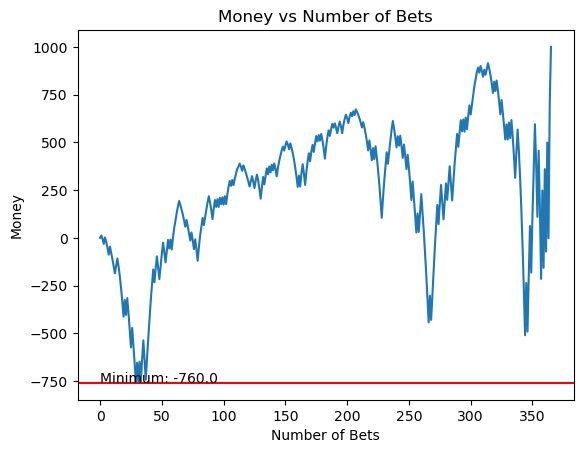

In [8]:
plot_money_histories(money_histories, 1000)